Created by Anna Anatoliyivna Musiyenko (u699701), Ilona van Ginneken (u823900) Taissiia Kosenok (2108387), & Paul Reinschlüssel (2111443)
(Group 26)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()

In [2]:

import random
import tensorflow as tf
import numpy as np
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
#only need this block the first time
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Replace these paths with the actual paths to your dataset folders
data_folder = "/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/ISIC2018_Task3_Training_Input/ISIC2018_Task3_Training_Input"
ground_truth_folder = "/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth"

csv_file_path = os.path.join(ground_truth_folder, "ISIC2018_Task3_Training_GroundTruth.csv")
df = pd.read_csv(csv_file_path)

image_data = []
labels = []

for index, row in df.iterrows():
    image_title = row['image']
    label = row.drop('image', axis=0)  # Drop the 'image' column to keep only labels

    image_path = os.path.join(data_folder, image_title + ".jpg")

    try:
        # Open the image using PIL (or you can use OpenCV) within a 'with' statement
        with Image.open(image_path) as image:
            if image is not None:
                # Resize images
                im = image.resize((120,150), Image.LANCZOS)
                # Append image and label to respective lists
                image_data.append(np.array(im))
                labels.append(label)
            else:
                print(f"Error opening image '{image_path}': NoneType object returned")
    except Exception as e:
        print(f"Error opening image '{image_path}': {e}")


tr_labels = np.array(labels)
image_matrix = np.array([np.array(img) for img in image_data])
np.save("/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/data.npy",image_matrix)
np.save("/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/labels.npy",tr_labels)

# Class mapping
class_mapping = {
    tuple([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanoma",
    tuple([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanocytic nevi",
    tuple([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]): "Basal cell carcinoma",
    tuple([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]): "Acaic",
    tuple([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]): "Benign keratosis-like lesions",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]): "Dermatofibroma",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]): "Vascular lesions"
}

# Convert float labels to class names
class_labels = [class_mapping[tuple(label)] for label in tr_labels]
np.save("/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/labels_name.npy",class_labels)






# Loading Dataset

You can download the dataset from {https://challenge.isic-archive.com/data/#2018}.
The data from **Task 3** will be used in this assignment. You should download the Training Data and its corresponding ground truth labels. The dataset consists of 10015 skin images from 7 classes. We will extract the images of 7 classes (Melanoma, Melanocytic nevi, Basal cell carcinoma, Actinic keratoses and intraepithelial carcinoma (akaic), Benign keratosis-like lesions, Dermatofibroma\ and Vascular lesions) and save them as .npy file with the following code:


Once you save your data, you can load it from your directory.

In [3]:
# Class mapping
class_mapping = {
    tuple([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanoma",
    tuple([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanocytic nevi",
    tuple([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]): "Basal cell carcinoma",
    tuple([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]): "Acaic",
    tuple([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]): "Benign keratosis-like lesions",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]): "Dermatofibroma",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]): "Vascular lesions"
}

In [4]:


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_dir = "/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/"
data = np.load(file_dir + "data.npy")
labels = np.load(file_dir + "labels.npy", allow_pickle=True)
class_labels = np.load(file_dir + "labels_name.npy")


## Preprocessing

In [5]:

# Convert labels to integer format
integer_labels = np.argmax(labels, axis=1)

# Count the occurrences of each label
label_counts = np.bincount(integer_labels)

# Create a list of class names
class_names = [class_mapping[tuple(label)] for label in np.eye(len(class_mapping))]

for class_name, count in zip(class_names, label_counts):
  print(f"{class_name}: {count} images")



Melanoma: 1113 images
Melanocytic nevi: 6705 images
Basal cell carcinoma: 514 images
Acaic: 327 images
Benign keratosis-like lesions: 1099 images
Dermatofibroma: 115 images
Vascular lesions: 142 images


In [6]:
print(class_names)

['Melanoma', 'Melanocytic nevi', 'Basal cell carcinoma', 'Acaic', 'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']


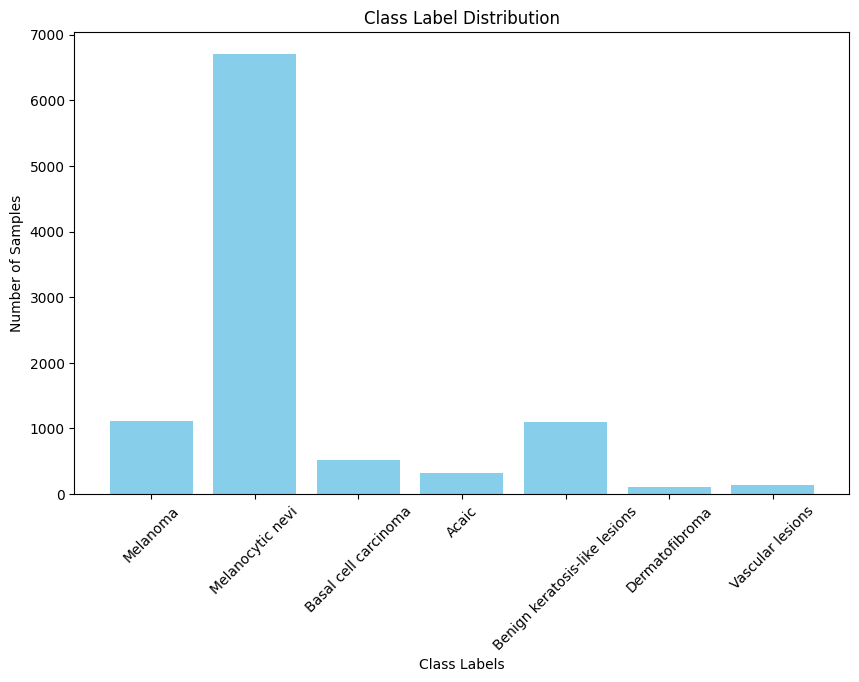

In [7]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, label_counts, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Label Distribution')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [8]:

import keras
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers


from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt


# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True, stratify=class_labels)

# Further splitting the training set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True, stratify=y_train)






In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical
reshaped_X_train = X_train.reshape(X_train.shape[0],-1)
strategy_over = {0:750, 2:750, 3:750, 4:750, 5:750, 6:750}
#y_train = y_train.argmax(axis=1)

oversampling = RandomOverSampler(sampling_strategy= strategy_over , random_state=42)

X_train, y_train = oversampling.fit_resample(reshaped_X_train, y_train.argmax(axis=1))
print(y_train)

y_train = to_categorical(y_train, num_classes = 7)
print(y_train)
undersampling = RandomUnderSampler(sampling_strategy = {1:750}, random_state=42)

X_train, y_train = undersampling.fit_resample(X_train, y_train.argmax(axis=1))

X_train = X_train.reshape(-1,150,120,3)


[1 6 0 ... 6 6 6]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [10]:
y_train_counts = np.bincount(y_train)

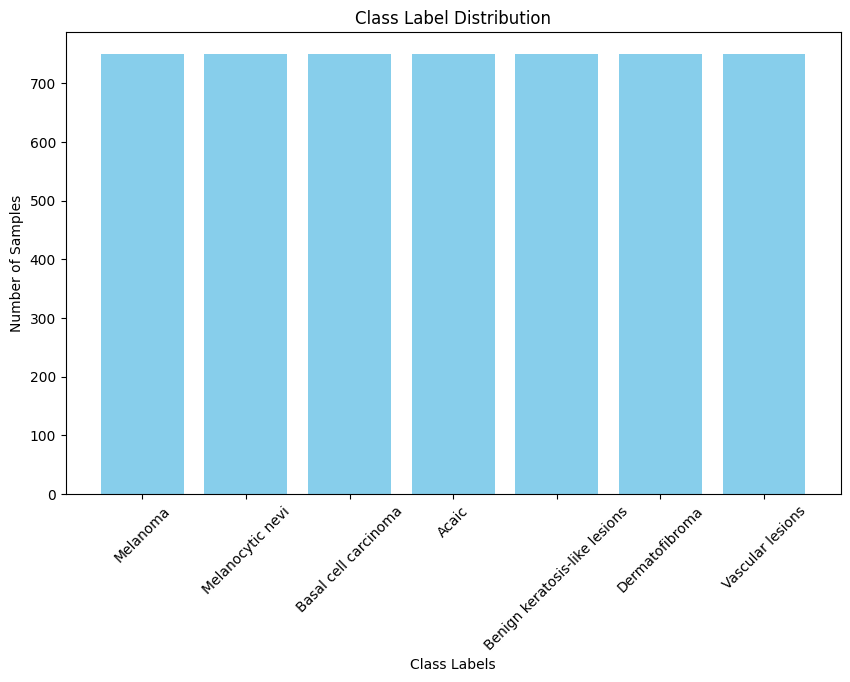

In [11]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, y_train_counts, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Label Distribution')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [12]:
y_train = to_categorical(y_train, num_classes = 7)
print(y_train)




[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [13]:
# Convert target labels to floats
y_train_float = y_train.astype('float32')
y_val_float = y_val.astype('float32')
y_test_float = y_test.astype('float32')

# Normalize image data
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

In [14]:
X_train = np.array(X_train_normalized).astype('float32')
y_train = np.array(y_train).astype('float32')
X_val= np.array(X_val_normalized).astype('float32')
y_val= np.array(y_val).astype('float32')
X_test= np.array(X_test_normalized).astype('float32')
y_test = np.array(y_test).astype('float32')

# Visualizing Sample images

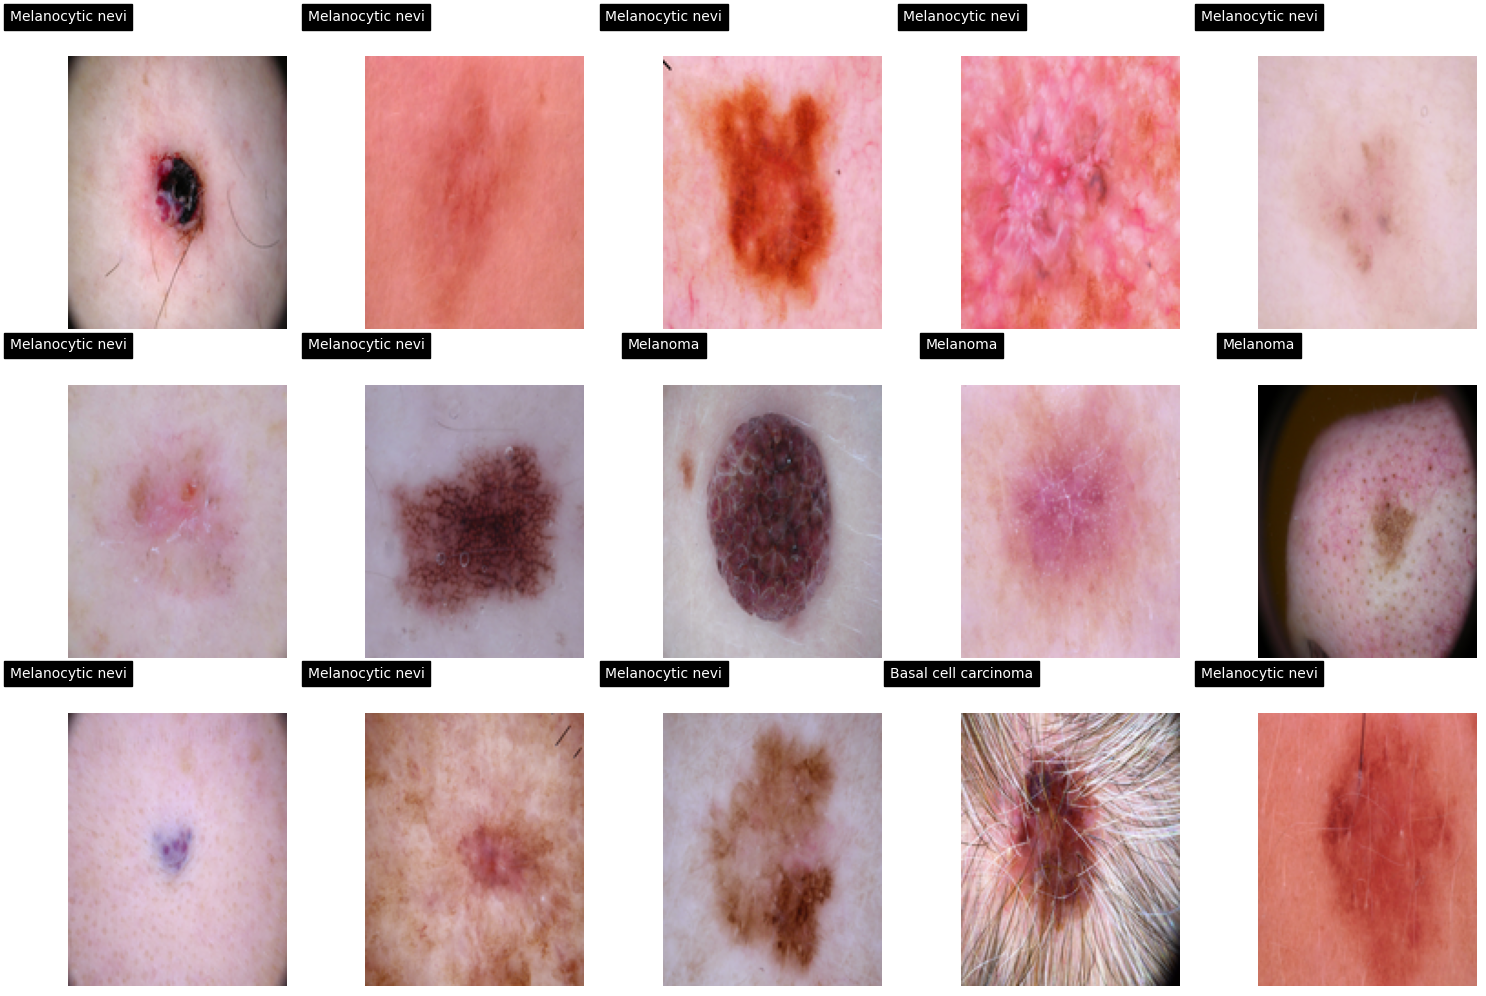

In [17]:
# Randomly select 15 samples
random_indices = random.sample(range(len(X_train)), 15)

# Create a figure with 3 rows and 5 columns
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

for i, idx in enumerate(random_indices):
    ax = axes[i // 5, i % 5]  # Calculate the position of the subplot
    ax.imshow(X_train_normalized[idx])  # Display the image (using normalized data)
    ax.axis('off')  # Turn off axis labels

    # Get the corresponding label
    label = class_names[integer_labels[idx]]

    # Display label as text on top of the image
    ax.text(0, -20, label, color='white', fontsize=10, backgroundcolor='black', ha='center')

plt.tight_layout()
plt.show()

# Baseline Model

In [17]:

from tensorflow.keras import Sequential
from tensorflow.keras import layers


def create_model():
  baseline = Sequential()
  baseline.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  baseline.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  baseline.add(layers.MaxPooling2D((2,2)))
  baseline.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  baseline.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  baseline.add(layers.MaxPooling2D((2,2)))
  baseline.add(layers.Flatten())
  baseline.add(layers.Dense(32, activation='relu'))
  baseline.add(layers.Dense(32, activation='relu'))
  baseline.add(layers.Dense(7, activation='softmax'))
  baseline.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return baseline



with tf.device(device_name):
# Create a sequential model
  	baseline = create_model()


# compile
baseline.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [18]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
history = baseline.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
165/165 [==============================] - 27s 93ms/step - loss: 1.8095 - accuracy: 0.2385 - val_loss: 1.2257 - val_accuracy: 0.5571
Epoch 2/10
165/165 [==============================] - 15s 88ms/step - loss: 1.4965 - accuracy: 0.4040 - val_loss: 1.5484 - val_accuracy: 0.3431
Epoch 3/10
165/165 [==============================] - 15s 89ms/step - loss: 1.2380 - accuracy: 0.5183 - val_loss: 1.5478 - val_accuracy: 0.2701
Epoch 4/10
165/165 [==============================] - 14s 85ms/step - loss: 0.9601 - accuracy: 0.6316 - val_loss: 1.7829 - val_accuracy: 0.3437
Epoch 5/10
165/165 [==============================] - 14s 84ms/step - loss: 0.6708 - accuracy: 0.7505 - val_loss: 1.4896 - val_accuracy: 0.4853
Epoch 6/10
165/165 [==============================] - 14s 88ms/step - loss: 0.4440 - accuracy: 0.8371 - val_loss: 1.3066 - val_accuracy: 0.6363
Epoch 7/10
165/165 [==============================] - 14s 84ms/step - loss: 0.2959 - accuracy: 0.8922 - val_loss: 1.7953 - val_accuracy:

In [19]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = baseline.evaluate (X_train, y_train)
val_loss, val_acc = baseline.evaluate(X_val, y_val)
test_loss, test_acc = baseline.evaluate(X_test, y_test)

63/63 [==============================] - 1s 18ms/step - loss: 2.7152 - accuracy: 0.5187


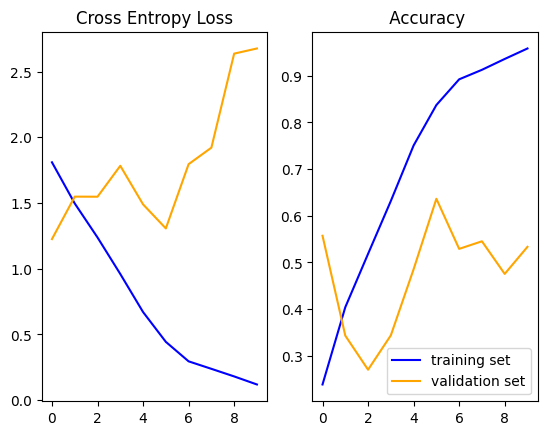

In [41]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(121)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	plt.subplot(122)
	plt.title(' Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='validation')
	plt.legend(['training set', 'validation set'])
	plt.show()

summarize_diagnostics(history)



In [30]:
y_pred_val = baseline.predict(X_val)
y_pred_test = baseline.predict(X_test)

63/63 [==============================] - 1s 13ms/step


[Text(0, 0.5, 'mel'),
 Text(0, 1.5, 'nv'),
 Text(0, 2.5, 'bcc'),
 Text(0, 3.5, 'acaic'),
 Text(0, 4.5, 'bkl'),
 Text(0, 5.5, 'df'),
 Text(0, 6.5, 'vasc')]

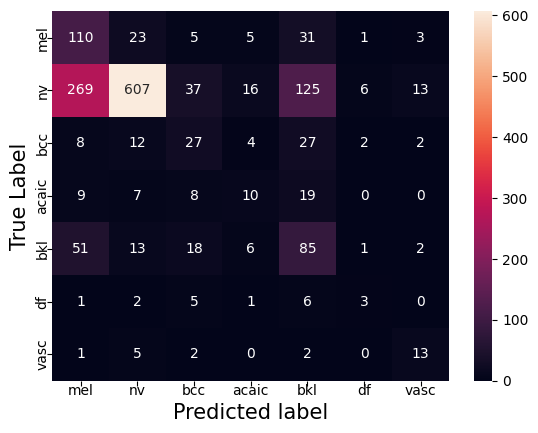

In [31]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

cmval = sns.heatmap(confusion_matrix(y_val.argmax(axis=1), y_pred_val.argmax(axis=1)), annot=True, fmt='g')
cmval.set_xlabel("Predicted label", fontsize = 15)
cmval.set_ylabel("True Label", fontsize = 15)
cmval.xaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], ha="center", va="center", rotation = 0)
cmval.yaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], rotation=90, va="center",  ha="center")

[Text(0, 0.5, 'mel'),
 Text(0, 1.5, 'nv'),
 Text(0, 2.5, 'bcc'),
 Text(0, 3.5, 'acaic'),
 Text(0, 4.5, 'bkl'),
 Text(0, 5.5, 'df'),
 Text(0, 6.5, 'vasc')]

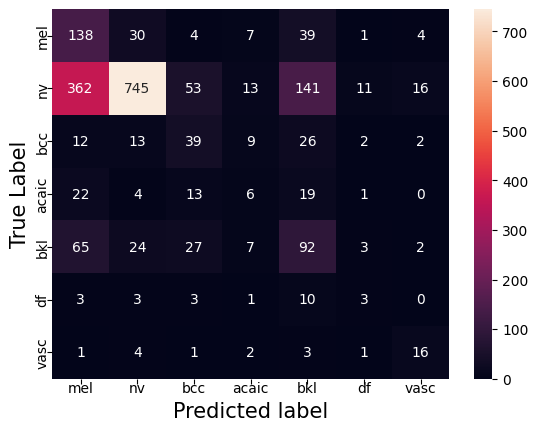

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
#Create confusion matrix
cm = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)), annot=True, fmt='g')
cm.set_xlabel("Predicted label", fontsize = 15)
cm.set_ylabel("True Label", fontsize = 15)
cm.xaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], ha="center", va="center", rotation = 0)
cm.yaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], rotation=90, va="center",  ha="center")

<ipython-input-34-4a3e0e4a95c8>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


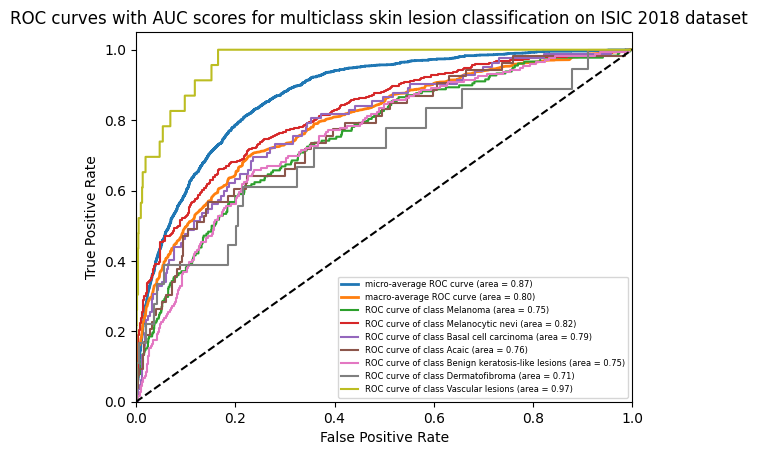

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Compute ROC curve and ROC area for each class
lesion_labels = [ "Melanoma", "Melanocytic nevi", "Basal cell carcinoma", "Acaic","Benign keratosis-like lesions", "Dermatofibroma","Vascular lesions"]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(lesion_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves with AUC scores for multiclass skin lesion classification on ISIC 2018 dataset (val) ')
plt.legend(loc="lower right", prop = {'size': 6})

plt.show()

<ipython-input-33-f8a00dd86abd>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


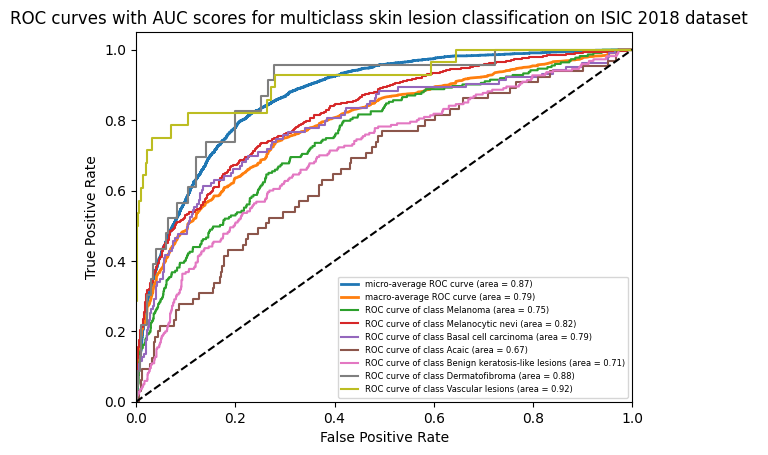

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Compute ROC curve and ROC area for each class
lesion_labels = [ "Melanoma", "Melanocytic nevi", "Basal cell carcinoma", "Acaic","Benign keratosis-like lesions", "Dermatofibroma","Vascular lesions"]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(lesion_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves with AUC scores for multiclass skin lesion classification on ISIC 2018 dataset (test)  ')
plt.legend(loc="lower right", prop = {'size': 6})

plt.show()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
target_names = [f"{lesion_labels[i]}" for i in range(7)]
print(classification_report(y_test.argmax(axis=1), y_pred_test.argmax(axis=1) , target_names =target_names ))

                               precision    recall  f1-score   support

                     Melanoma       0.23      0.62      0.33       223
             Melanocytic nevi       0.91      0.56      0.69      1341
         Basal cell carcinoma       0.28      0.38      0.32       103
                        Acaic       0.13      0.09      0.11        65
Benign keratosis-like lesions       0.28      0.42      0.33       220
               Dermatofibroma       0.14      0.13      0.13        23
             Vascular lesions       0.40      0.57      0.47        28

                     accuracy                           0.52      2003
                    macro avg       0.34      0.40      0.34      2003
                 weighted avg       0.69      0.52      0.56      2003



In [36]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

for i in range(7):
    tp = cm_test[i, i]
    fn = sum(cm_test[i, :]) - tp
    fp = sum(cm_test[:, i]) - tp
    tn = sum(sum(cm_test)) - tp - fn - fp

    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp+fp)
    f1 = (2*tp)/(2*tp+fp+fn)
    print(f"Class {i}: accuracy = {accuracy:.2f}, sensitivity/recall = {sensitivity:.2f}, specificity = {specificity:.2f}, precision = {precision:.2f}, F1-score = {f1:.2f}")

Class 0: accuracy = 0.73, sensitivity/recall = 0.62, specificity = 0.74, precision = 0.23, F1-score = 0.33
Class 1: accuracy = 0.66, sensitivity/recall = 0.56, specificity = 0.88, precision = 0.91, F1-score = 0.69
Class 2: accuracy = 0.92, sensitivity/recall = 0.38, specificity = 0.95, precision = 0.28, F1-score = 0.32
Class 3: accuracy = 0.95, sensitivity/recall = 0.09, specificity = 0.98, precision = 0.13, F1-score = 0.11
Class 4: accuracy = 0.82, sensitivity/recall = 0.42, specificity = 0.87, precision = 0.28, F1-score = 0.33
Class 5: accuracy = 0.98, sensitivity/recall = 0.13, specificity = 0.99, precision = 0.14, F1-score = 0.13
Class 6: accuracy = 0.98, sensitivity/recall = 0.57, specificity = 0.99, precision = 0.40, F1-score = 0.47


In [37]:
from sklearn.metrics import confusion_matrix
cm_val = confusion_matrix(y_val.argmax(axis=1), y_pred_val.argmax(axis=1))

for i in range(7):
    tp = cm_val[i, i]
    fn = sum(cm_val[i, :]) - tp
    fp = sum(cm_val[:, i]) - tp
    tn = sum(sum(cm_val)) - tp - fn - fp

    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp+fp)
    f1 = (2*tp)/(2*tp+fp+fn)
    print(f"Class {i}: accuracy = {accuracy:.2f}, sensitivity/recall = {sensitivity:.2f}, specificity = {specificity:.2f}, precision = {precision:.2f}, F1-score = {f1:.2f}")

Class 0: accuracy = 0.75, sensitivity/recall = 0.62, specificity = 0.76, precision = 0.24, F1-score = 0.35
Class 1: accuracy = 0.67, sensitivity/recall = 0.57, specificity = 0.88, precision = 0.91, F1-score = 0.70
Class 2: accuracy = 0.92, sensitivity/recall = 0.33, specificity = 0.95, precision = 0.26, F1-score = 0.29
Class 3: accuracy = 0.95, sensitivity/recall = 0.19, specificity = 0.98, precision = 0.24, F1-score = 0.21
Class 4: accuracy = 0.81, sensitivity/recall = 0.48, specificity = 0.85, precision = 0.29, F1-score = 0.36
Class 5: accuracy = 0.98, sensitivity/recall = 0.17, specificity = 0.99, precision = 0.23, F1-score = 0.19
Class 6: accuracy = 0.98, sensitivity/recall = 0.57, specificity = 0.99, precision = 0.39, F1-score = 0.46


In [38]:
print('F1 Score baseline: %.3f' % f1_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Recall baseline: %.3f' % recall_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Precision baseline: %.3f' % precision_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Accuracy baseline: %.3f' % accuracy_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1)))

F1 Score baseline: 0.367
Recall baseline: 0.417
Precision baseline: 0.367
Accuracy baseline: 0.533


In [39]:
print('F1 Score baseline: %.3f' % f1_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Recall baseline: %.3f' % recall_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Precision baseline: %.3f' % precision_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Accuracy baseline: %.3f' % accuracy_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)))

F1 Score baseline: 0.342
Recall baseline: 0.395
Precision baseline: 0.337
Accuracy baseline: 0.519


## Enhanced Model

First, we check whether setting epoch size with early stopping criteria has an impact on the model performance.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers


def create_model():
  baseline = Sequential()
  baseline.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  baseline.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  baseline.add(layers.MaxPooling2D((2,2)))
  baseline.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  baseline.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  baseline.add(layers.MaxPooling2D((2,2)))
  baseline.add(layers.Flatten())
  baseline.add(layers.Dense(32, activation='relu'))
  baseline.add(layers.Dense(32, activation='relu'))
  baseline.add(layers.Dense(7, activation='softmax'))
  baseline.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return baseline



with tf.device(device_name):
# Create a sequential model
  	baseline = create_model()


# compile
baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
#Set epochs to 20 with early stopping criteria based on max validation accuracy

os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 5, verbose =1, restore_best_weights = True)
history_epoch = baseline.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/20
165/165 [==============================] - 31s 95ms/step - loss: 1.8095 - accuracy: 0.2385 - val_loss: 1.2257 - val_accuracy: 0.5571
Epoch 2/20
165/165 [==============================] - 14s 86ms/step - loss: 1.4965 - accuracy: 0.4040 - val_loss: 1.5484 - val_accuracy: 0.3431
Epoch 3/20
165/165 [==============================] - 14s 84ms/step - loss: 1.2380 - accuracy: 0.5183 - val_loss: 1.5478 - val_accuracy: 0.2701
Epoch 4/20
165/165 [==============================] - 14s 87ms/step - loss: 0.9601 - accuracy: 0.6316 - val_loss: 1.7829 - val_accuracy: 0.3437
Epoch 5/20
165/165 [==============================] - 14s 87ms/step - loss: 0.6708 - accuracy: 0.7505 - val_loss: 1.4896 - val_accuracy: 0.4853
Epoch 6/20
165/165 [==============================] - 14s 87ms/step - loss: 0.4440 - accuracy: 0.8371 - val_loss: 1.3066 - val_accuracy: 0.6363
Epoch 7/20
165/165 [==============================] - 15s 89ms/step - loss: 0.2959 - accuracy: 0.8922 - val_loss: 1.7953 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = baseline.evaluate(X_train, y_train)
val_loss, val_acc = baseline.evaluate(X_val, y_val)

51/51 [==============================] - 1s 16ms/step - loss: 1.3066 - accuracy: 0.6363


In addition, we will check what the effect of different optimizers is on the model performance

Adamax

In [ ]:
#checking different optimizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers


def create_model_opt_adamax():
  optimizer1 = Sequential()
  optimizer1.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  optimizer1.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  optimizer1.add(layers.MaxPooling2D((2,2)))
  optimizer1.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  optimizer1.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  optimizer1.add(layers.MaxPooling2D((2,2)))
  optimizer1.add(layers.Flatten())
  optimizer1.add(layers.Dense(32, activation='relu'))
  optimizer1.add(layers.Dense(32, activation='relu'))
  optimizer1.add(layers.Dense(7, activation='softmax'))
  optimizer1.compile(optimizer='adamax',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return optimizer1



with tf.device(device_name):
# Create a sequential model
  	optimizer1 = create_model_opt_adamax()


# compile
optimizer1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
history_adamax = optimizer1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 29s 103ms/step - loss: 1.8441 - accuracy: 0.2328 - val_loss: 1.3360 - val_accuracy: 0.5134
Epoch 2/10
165/165 [==============================] - 15s 88ms/step - loss: 1.4867 - accuracy: 0.4141 - val_loss: 1.2413 - val_accuracy: 0.4991
Epoch 3/10
165/165 [==============================] - 14s 88ms/step - loss: 1.1531 - accuracy: 0.5615 - val_loss: 1.3062 - val_accuracy: 0.4729
Epoch 4/10
165/165 [==============================] - 15s 91ms/step - loss: 0.9652 - accuracy: 0.6406 - val_loss: 1.4226 - val_accuracy: 0.4972
Epoch 5/10
165/165 [==============================] - 15s 91ms/step - loss: 0.8443 - accuracy: 0.6930 - val_loss: 1.5066 - val_accuracy: 0.4885
Epoch 6/10
165/165 [==============================] - 15s 89ms/step - loss: 0.7430 - accuracy: 0.7282 - val_loss: 1.2659 - val_accuracy: 0.5346
Epoch 7/10
165/165 [==============================] - 15s 94ms/step - loss: 0.6644 - accuracy: 0.7579 - val_loss: 1.3437 - val_accuracy

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
train_loss, train_acc = optimizer1.evaluate(X_train, y_train)
val_loss, val_acc = optimizer1.evaluate(X_val, y_val)

51/51 [==============================] - 1s 14ms/step - loss: 1.5089 - accuracy: 0.5471


RMSprop

In [ ]:
#checking different optimizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers


def create_model_opt_rms():
  optimizer2 = Sequential()
  optimizer2.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  optimizer2.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  optimizer2.add(layers.MaxPooling2D((2,2)))
  optimizer2.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  optimizer2.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  optimizer2.add(layers.MaxPooling2D((2,2)))
  optimizer2.add(layers.Flatten())
  optimizer2.add(layers.Dense(32, activation='relu'))
  optimizer2.add(layers.Dense(32, activation='relu'))
  optimizer2.add(layers.Dense(7, activation='softmax'))
  optimizer2.compile(optimizer="rmsprop",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return optimizer2



with tf.device(device_name):
# Create a sequential model
  	optimizer2 = create_model_opt_rms()


# compile
optimizer2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
history_rmsprop = optimizer2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 33s 108ms/step - loss: 1.8948 - accuracy: 0.2032 - val_loss: 1.1874 - val_accuracy: 0.5864
Epoch 2/10
165/165 [==============================] - 14s 87ms/step - loss: 1.6365 - accuracy: 0.3490 - val_loss: 1.2110 - val_accuracy: 0.5246
Epoch 3/10
165/165 [==============================] - 14s 84ms/step - loss: 1.3605 - accuracy: 0.4792 - val_loss: 2.6746 - val_accuracy: 0.1703
Epoch 4/10
165/165 [==============================] - 14s 87ms/step - loss: 1.1957 - accuracy: 0.5472 - val_loss: 2.4011 - val_accuracy: 0.1971
Epoch 5/10
165/165 [==============================] - 14s 85ms/step - loss: 1.0801 - accuracy: 0.5989 - val_loss: 1.4675 - val_accuracy: 0.4473
Epoch 6/10
165/165 [==============================] - 15s 91ms/step - loss: 0.8995 - accuracy: 0.6545 - val_loss: 1.3339 - val_accuracy: 0.4841
Epoch 7/10
165/165 [==============================] - 14s 87ms/step - loss: 0.8144 - accuracy: 0.7130 - val_loss: 1.2522 - val_accuracy

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
train_loss, train_acc = optimizer2.evaluate (X_train, y_train)
val_loss, val_acc = optimizer2.evaluate(X_val, y_val)

51/51 [==============================] - 1s 15ms/step - loss: 3.2150 - accuracy: 0.3375


sgd

In [ ]:
#checking different optimizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers


def create_model_opt_sgd():
  optimizer3 = Sequential()
  optimizer3.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  optimizer3.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  optimizer3.add(layers.MaxPooling2D((2,2)))
  optimizer3.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  optimizer3.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  optimizer3.add(layers.MaxPooling2D((2,2)))
  optimizer3.add(layers.Flatten())
  optimizer3.add(layers.Dense(32, activation='relu'))
  optimizer3.add(layers.Dense(32, activation='relu'))
  optimizer3.add(layers.Dense(7, activation='softmax'))
  optimizer3.compile(optimizer="sgd",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return optimizer3



with tf.device(device_name):
# Create a sequential model
  	optimizer3 = create_model_opt_sgd()


# compile
optimizer3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
history_sgd = optimizer3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 27s 96ms/step - loss: 1.9362 - accuracy: 0.1691 - val_loss: 1.8113 - val_accuracy: 0.6438
Epoch 2/10
165/165 [==============================] - 14s 84ms/step - loss: 1.8884 - accuracy: 0.2337 - val_loss: 1.4149 - val_accuracy: 0.6606
Epoch 3/10
165/165 [==============================] - 14s 83ms/step - loss: 1.8060 - accuracy: 0.2570 - val_loss: 2.4286 - val_accuracy: 0.0418
Epoch 4/10
165/165 [==============================] - 15s 88ms/step - loss: 1.7347 - accuracy: 0.2992 - val_loss: 3.0032 - val_accuracy: 0.1173
Epoch 5/10
165/165 [==============================] - 14s 84ms/step - loss: 1.6804 - accuracy: 0.3307 - val_loss: 1.8717 - val_accuracy: 0.4448
Epoch 6/10
165/165 [==============================] - 14s 85ms/step - loss: 1.6633 - accuracy: 0.3354 - val_loss: 1.7883 - val_accuracy: 0.3961
Epoch 7/10
165/165 [==============================] - 14s 87ms/step - loss: 1.5672 - accuracy: 0.3952 - val_loss: 1.8989 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = optimizer3.evaluate(X_train, y_train)
val_loss, val_acc = optimizer3.evaluate(X_val, y_val)

51/51 [==============================] - 1s 15ms/step - loss: 2.1722 - accuracy: 0.4236


We also check the effect of different activation functions. In this case we will check what happens if we replace relu with leaky relu in the second round of convolutional layers.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import LeakyReLU

# Create a sequential model
activationmodel = Sequential()



# Add convolutional and pooling layers
activationmodel.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
activationmodel.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
activationmodel.add(layers.MaxPooling2D((2,2)))
activationmodel.add(layers.Conv2D(64, (3,3), activation=LeakyReLU(0.2), padding = "same"))
activationmodel.add(layers.Conv2D(32, (3,3),activation=LeakyReLU(0.2), padding = "same"))
activationmodel.add(layers.MaxPooling2D((2,2)))
activationmodel.add(layers.Flatten())
activationmodel.add(layers.Dense(32, activation='relu'))
activationmodel.add(layers.Dense(32, activation='relu'))
activationmodel.add(layers.Dense(7, activation='softmax'))
activationmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
history_activationmodel = activationmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 34s 110ms/step - loss: 1.7696 - accuracy: 0.2766 - val_loss: 1.2045 - val_accuracy: 0.5190
Epoch 2/10
165/165 [==============================] - 14s 88ms/step - loss: 1.4339 - accuracy: 0.4343 - val_loss: 1.2141 - val_accuracy: 0.5483
Epoch 3/10
165/165 [==============================] - 14s 88ms/step - loss: 1.1919 - accuracy: 0.5478 - val_loss: 1.7829 - val_accuracy: 0.3562
Epoch 4/10
165/165 [==============================] - 15s 89ms/step - loss: 0.9626 - accuracy: 0.6331 - val_loss: 1.8206 - val_accuracy: 0.4448
Epoch 5/10
165/165 [==============================] - 15s 88ms/step - loss: 0.7434 - accuracy: 0.7229 - val_loss: 1.4519 - val_accuracy: 0.5147
Epoch 6/10
165/165 [==============================] - 15s 90ms/step - loss: 0.6076 - accuracy: 0.7758 - val_loss: 1.5289 - val_accuracy: 0.5066
Epoch 7/10
165/165 [==============================] - 15s 88ms/step - loss: 0.4791 - accuracy: 0.8183 - val_loss: 1.4917 - val_accuracy

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = activationmodel.evaluate(X_train, y_train)
val_loss, val_acc = activationmodel.evaluate(X_val, y_val)

51/51 [==============================] - 1s 16ms/step - loss: 1.6408 - accuracy: 0.5646


We also converted every ReLU activation function into LeakyReLU.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import LeakyReLU
# Create a sequential model
activationmodel2 = Sequential()



# Add convolutional and pooling layers
activationmodel2.add(layers.Conv2D(64, (3,3), activation=LeakyReLU(0.2), padding = "same", input_shape = X_train.shape[1:] ))
activationmodel2.add(layers.Conv2D(32, (3,3),activation=LeakyReLU(0.2), padding = "same" ))
activationmodel2.add(layers.MaxPooling2D((2,2)))
activationmodel2.add(layers.Conv2D(64, (3,3), activation=LeakyReLU(0.2), padding = "same"))
activationmodel2.add(layers.Conv2D(32, (3,3),activation=LeakyReLU(0.2), padding = "same"))
activationmodel2.add(layers.MaxPooling2D((2,2)))
activationmodel2.add(layers.Flatten())
activationmodel2.add(layers.Dense(32, activation=LeakyReLU(0.2)))
activationmodel2.add(layers.Dense(32, activation=LeakyReLU(0.2)))
activationmodel2.add(layers.Dense(7, activation='softmax'))
activationmodel2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
history_activation2 = activationmodel2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 29s 103ms/step - loss: 1.7767 - accuracy: 0.2699 - val_loss: 1.1344 - val_accuracy: 0.6332
Epoch 2/10
165/165 [==============================] - 16s 95ms/step - loss: 1.3513 - accuracy: 0.4699 - val_loss: 1.0554 - val_accuracy: 0.5789
Epoch 3/10
165/165 [==============================] - 16s 97ms/step - loss: 1.1205 - accuracy: 0.5653 - val_loss: 1.7262 - val_accuracy: 0.4211
Epoch 4/10
165/165 [==============================] - 15s 94ms/step - loss: 0.9920 - accuracy: 0.6189 - val_loss: 1.5699 - val_accuracy: 0.5203
Epoch 5/10
165/165 [==============================] - 16s 95ms/step - loss: 0.7928 - accuracy: 0.7120 - val_loss: 1.3264 - val_accuracy: 0.5483
Epoch 6/10
165/165 [==============================] - 15s 92ms/step - loss: 0.6558 - accuracy: 0.7587 - val_loss: 1.5585 - val_accuracy: 0.4922
Epoch 7/10
165/165 [==============================] - 16s 94ms/step - loss: 0.5184 - accuracy: 0.8097 - val_loss: 1.3595 - val_accuracy

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = activationmodel2.evaluate(X_train, y_train)
val_loss, val_acc = activationmodel2.evaluate(X_val, y_val)

51/51 [==============================] - 1s 21ms/step - loss: 1.8799 - accuracy: 0.5939


Moreover, we check at the effect of changing the amount of neurons in each layer.

First, we change number of neurons to 32 in all layers.

In [ ]:
#checking effect of different amount of neurons

from tensorflow.keras import Sequential
from tensorflow.keras import layers


def create_model_lessneurons():
  neuronmodel = Sequential()
  neuronmodel.add(layers.Conv2D(32, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  neuronmodel.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  neuronmodel.add(layers.MaxPooling2D((2,2)))
  neuronmodel.add(layers.Conv2D(32, (3,3), activation='relu', padding = "same"))
  neuronmodel.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  neuronmodel.add(layers.MaxPooling2D((2,2)))
  neuronmodel.add(layers.Flatten())
  neuronmodel.add(layers.Dense(32, activation='relu'))
  neuronmodel.add(layers.Dense(32, activation='relu'))
  neuronmodel.add(layers.Dense(7, activation='softmax'))
  neuronmodel.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return neuronmodel



with tf.device(device_name):
# Create a sequential model
  	neuronmodel = create_model_lessneurons()


# compile
neuronmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
historyneuron = neuronmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 22s 64ms/step - loss: 1.7801 - accuracy: 0.2636 - val_loss: 1.2940 - val_accuracy: 0.5296
Epoch 2/10
165/165 [==============================] - 9s 52ms/step - loss: 1.3883 - accuracy: 0.4339 - val_loss: 1.2348 - val_accuracy: 0.5197
Epoch 3/10
165/165 [==============================] - 9s 56ms/step - loss: 1.2026 - accuracy: 0.5158 - val_loss: 1.5031 - val_accuracy: 0.3986
Epoch 4/10
165/165 [==============================] - 9s 53ms/step - loss: 1.0179 - accuracy: 0.5970 - val_loss: 2.0771 - val_accuracy: 0.2907
Epoch 5/10
165/165 [==============================] - 9s 53ms/step - loss: 0.8306 - accuracy: 0.6867 - val_loss: 1.5404 - val_accuracy: 0.4579
Epoch 6/10
165/165 [==============================] - 9s 57ms/step - loss: 0.6519 - accuracy: 0.7594 - val_loss: 1.3958 - val_accuracy: 0.5265
Epoch 7/10
165/165 [==============================] - 9s 52ms/step - loss: 0.5048 - accuracy: 0.8164 - val_loss: 1.6314 - val_accuracy: 0.513

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = neuronmodel.evaluate (X_train, y_train)
val_loss, val_acc = neuronmodel.evaluate(X_val, y_val)


51/51 [==============================] - 1s 10ms/step - loss: 1.7176 - accuracy: 0.6114


We do the same but now with 64 neurons per layer.

In [ ]:
#checking effect of different amount of neurons

from tensorflow.keras import Sequential
from tensorflow.keras import layers


def create_model_moreneurons():
  neuronmodelL = Sequential()
  neuronmodelL.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  neuronmodelL.add(layers.Conv2D(64, (3,3),activation='relu', padding = "same" ))
  neuronmodelL.add(layers.MaxPooling2D((2,2)))
  neuronmodelL.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  neuronmodelL.add(layers.Conv2D(64, (3,3),activation='relu', padding = "same"))
  neuronmodelL.add(layers.MaxPooling2D((2,2)))
  neuronmodelL.add(layers.Flatten())
  neuronmodelL.add(layers.Dense(64, activation='relu'))
  neuronmodelL.add(layers.Dense(64, activation='relu'))
  neuronmodelL.add(layers.Dense(7, activation='softmax'))
  neuronmodelL.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return neuronmodelL



with tf.device(device_name):
# Create a sequential model
  	neuronmodelL = create_model_moreneurons()


# compile
neuronmodelL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 64)        0         
 g2D)                                                   

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
history_neuronL = neuronmodelL.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 26s 79ms/step - loss: 1.7717 - accuracy: 0.2613 - val_loss: 1.4597 - val_accuracy: 0.4173
Epoch 2/10
165/165 [==============================] - 12s 71ms/step - loss: 1.4347 - accuracy: 0.4221 - val_loss: 1.5031 - val_accuracy: 0.4722
Epoch 3/10
165/165 [==============================] - 12s 71ms/step - loss: 1.2371 - accuracy: 0.5011 - val_loss: 1.5264 - val_accuracy: 0.3375
Epoch 4/10
165/165 [==============================] - 13s 78ms/step - loss: 1.0369 - accuracy: 0.5865 - val_loss: 1.5368 - val_accuracy: 0.4099
Epoch 5/10
165/165 [==============================] - 12s 71ms/step - loss: 0.8256 - accuracy: 0.6874 - val_loss: 1.4210 - val_accuracy: 0.5296
Epoch 6/10
165/165 [==============================] - 11s 70ms/step - loss: 0.5731 - accuracy: 0.7829 - val_loss: 1.3106 - val_accuracy: 0.5895
Epoch 7/10
165/165 [==============================] - 11s 69ms/step - loss: 0.4028 - accuracy: 0.8524 - val_loss: 1.4220 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = neuronmodelL.evaluate(X_train, y_train)
val_loss, val_acc = neuronmodelL.evaluate(X_val, y_val)

51/51 [==============================] - 1s 22ms/step - loss: 2.4345 - accuracy: 0.5377


We also checked what happend if we add an extra round of convolutional and pooling layers or cut one round out of the model.

In [ ]:
#model with extra round of convolutional and pooling layers
from tensorflow.keras import Sequential
from tensorflow.keras import layers
with tf.device(device_name):
  # Create a sequential model
  extralayers = Sequential()



  # Add convolutional and pooling layers
  extralayers.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  extralayers.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  extralayers.add(layers.MaxPooling2D((2,2)))
  extralayers.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  extralayers.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  extralayers.add(layers.MaxPooling2D((2,2)))
  extralayers.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  extralayers.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  extralayers.add(layers.MaxPooling2D((2,2)))
  extralayers.add(layers.Flatten())
  extralayers.add(layers.Dense(32, activation='relu'))
  extralayers.add(layers.Dense(32, activation='relu'))
  extralayers.add(layers.Dense(7, activation='softmax'))
  extralayers.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
historyextra = extralayers.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 30s 97ms/step - loss: 1.9465 - accuracy: 0.1442 - val_loss: 1.9428 - val_accuracy: 0.0331
Epoch 2/10
165/165 [==============================] - 14s 87ms/step - loss: 1.9460 - accuracy: 0.1366 - val_loss: 1.9692 - val_accuracy: 0.1085
Epoch 3/10
165/165 [==============================] - 15s 91ms/step - loss: 1.9463 - accuracy: 0.1516 - val_loss: 1.9428 - val_accuracy: 0.1098
Epoch 4/10
165/165 [==============================] - 15s 90ms/step - loss: 1.9462 - accuracy: 0.1389 - val_loss: 1.9426 - val_accuracy: 0.1110
Epoch 5/10
165/165 [==============================] - 16s 94ms/step - loss: 1.9461 - accuracy: 0.1387 - val_loss: 1.9418 - val_accuracy: 0.1110
Epoch 6/10
165/165 [==============================] - 15s 88ms/step - loss: 1.9461 - accuracy: 0.1429 - val_loss: 1.9417 - val_accuracy: 0.1110
Epoch 7/10
165/165 [==============================] - 16s 96ms/step - loss: 1.9461 - accuracy: 0.1366 - val_loss: 1.9424 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = extralayers.evaluate (X_train, y_train)
val_loss, val_acc = extralayers.evaluate(X_val, y_val)

51/51 [==============================] - 1s 15ms/step - loss: 1.9440 - accuracy: 0.0143


We also checked the effect of removing one round of convolutional and pooling layers.

In [ ]:
#model with only one round of convolutional and pooling layers
from tensorflow.keras import Sequential
from tensorflow.keras import layers
with tf.device(device_name):
  # Create a sequential model
  lesslayers = Sequential()



  # Add convolutional and pooling layers
  lesslayers.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  lesslayers.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  lesslayers.add(layers.MaxPooling2D((2,2)))
  lesslayers.add(layers.Flatten())
  lesslayers.add(layers.Dense(32, activation='relu'))
  lesslayers.add(layers.Dense(32, activation='relu'))
  lesslayers.add(layers.Dense(7, activation='softmax'))
  lesslayers.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
historyless = lesslayers.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 36s 110ms/step - loss: 1.8008 - accuracy: 0.2547 - val_loss: 1.3268 - val_accuracy: 0.5097
Epoch 2/10
165/165 [==============================] - 12s 75ms/step - loss: 1.2908 - accuracy: 0.4878 - val_loss: 1.1320 - val_accuracy: 0.5845
Epoch 3/10
165/165 [==============================] - 12s 73ms/step - loss: 0.9881 - accuracy: 0.6213 - val_loss: 1.6410 - val_accuracy: 0.4304
Epoch 4/10
165/165 [==============================] - 12s 73ms/step - loss: 0.7784 - accuracy: 0.7118 - val_loss: 1.3821 - val_accuracy: 0.5234
Epoch 5/10
165/165 [==============================] - 12s 74ms/step - loss: 0.5911 - accuracy: 0.7874 - val_loss: 1.5807 - val_accuracy: 0.5303
Epoch 6/10
165/165 [==============================] - 12s 74ms/step - loss: 0.4751 - accuracy: 0.8309 - val_loss: 1.4987 - val_accuracy: 0.5359
Epoch 7/10
165/165 [==============================] - 12s 73ms/step - loss: 0.3647 - accuracy: 0.8621 - val_loss: 1.6572 - val_accuracy

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = lesslayers.evaluate (X_train, y_train)
val_loss, val_acc = lesslayers.evaluate(X_val, y_val)

51/51 [==============================] - 1s 12ms/step - loss: 1.9594 - accuracy: 0.5540


We also checked whether adding dropout layers improved the model performance

In [15]:
#checking effect of adding dropout layers
from tensorflow.keras import Sequential
from tensorflow.keras import layers

with tf.device(device_name):
  # dropout model
  # Create a sequential model
  dropoutmodel = Sequential()
  dropoutmodel.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  dropoutmodel.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  dropoutmodel.add(layers.MaxPooling2D((2,2)))
  # 2nd repetition of the first four layers
  dropoutmodel.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  dropoutmodel.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  dropoutmodel.add(layers.MaxPooling2D((2,2)))
  #flattening layer
  dropoutmodel.add(layers.Flatten())
  #two dense layers of sizes 32 with Relu activation function & dropout layer
  dropoutmodel.add(layers.Dense(32, activation='relu'))
  dropoutmodel.add(layers.Dense(32, activation='relu'))
  dropoutmodel.add(layers.Dropout(0.3))
  # output layer with the proper activation function
  dropoutmodel.add(layers.Dense(7, activation='softmax'))
  dropoutmodel.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [16]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
history_dropout = dropoutmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 28s 98ms/step - loss: 1.9483 - accuracy: 0.1408 - val_loss: 1.9424 - val_accuracy: 0.0331
Epoch 2/10
165/165 [==============================] - 14s 84ms/step - loss: 1.9369 - accuracy: 0.1737 - val_loss: 1.6074 - val_accuracy: 0.5515
Epoch 3/10
165/165 [==============================] - 14s 84ms/step - loss: 1.7742 - accuracy: 0.2760 - val_loss: 1.3980 - val_accuracy: 0.4373
Epoch 4/10
165/165 [==============================] - 15s 88ms/step - loss: 1.6468 - accuracy: 0.3360 - val_loss: 1.7723 - val_accuracy: 0.2682
Epoch 5/10
165/165 [==============================] - 14s 83ms/step - loss: 1.5308 - accuracy: 0.4000 - val_loss: 1.3510 - val_accuracy: 0.4510
Epoch 6/10
165/165 [==============================] - 14s 83ms/step - loss: 1.3032 - accuracy: 0.5015 - val_loss: 1.7312 - val_accuracy: 0.3593
Epoch 7/10
165/165 [==============================] - 14s 87ms/step - loss: 1.0764 - accuracy: 0.5935 - val_loss: 1.3815 - val_accuracy:

In [17]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = dropoutmodel.evaluate (X_train, y_train)
val_loss, val_acc = dropoutmodel.evaluate(X_val, y_val)


51/51 [==============================] - 1s 14ms/step - loss: 1.7425 - accuracy: 0.4242


In [15]:
#checking effect of adding dropout layers after max pooling layers and dense layers
from tensorflow.keras import Sequential
from tensorflow.keras import layers

with tf.device(device_name):
  # dropout model
  # Create a sequential model
  dropoutmodel2 = Sequential()
  dropoutmodel2.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  dropoutmodel2.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))
  dropoutmodel2.add(layers.MaxPooling2D((2,2)))
  dropoutmodel2.add(layers.Dropout(0.3))
  # 2nd repetition of the first four layers
  dropoutmodel2.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  dropoutmodel2.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  dropoutmodel2.add(layers.MaxPooling2D((2,2)))
  dropoutmodel2.add(layers.Dropout(0.3))
  #flattening layer
  dropoutmodel2.add(layers.Flatten())
  #two dense layers of sizes 32 with Relu activation function & dropout layer
  dropoutmodel2.add(layers.Dense(32, activation='relu'))
  dropoutmodel2.add(layers.Dense(32, activation='relu'))
  dropoutmodel2.add(layers.Dropout(0.3))
  # output layer with the proper activation function
  dropoutmodel2.add(layers.Dense(7, activation='softmax'))
  dropoutmodel2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
history_dropout2 = dropoutmodel2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 30s 116ms/step - loss: 1.9463 - accuracy: 0.1478 - val_loss: 1.8462 - val_accuracy: 0.4672
Epoch 2/10
165/165 [==============================] - 18s 111ms/step - loss: 1.9380 - accuracy: 0.1509 - val_loss: 1.9641 - val_accuracy: 0.1098
Epoch 3/10
165/165 [==============================] - 18s 111ms/step - loss: 1.9466 - accuracy: 0.1383 - val_loss: 1.9445 - val_accuracy: 0.0331
Epoch 4/10
165/165 [==============================] - 18s 108ms/step - loss: 1.9463 - accuracy: 0.1400 - val_loss: 1.9414 - val_accuracy: 0.1110
Epoch 5/10
165/165 [==============================] - 18s 110ms/step - loss: 1.9462 - accuracy: 0.1429 - val_loss: 1.9404 - val_accuracy: 0.1110
Epoch 6/10
165/165 [==============================] - 18s 110ms/step - loss: 1.9461 - accuracy: 0.1425 - val_loss: 1.9385 - val_accuracy: 0.6694
Epoch 7/10
165/165 [==============================] - 18s 107ms/step - loss: 1.9460 - accuracy: 0.1432 - val_loss: 1.9423 - val_ac

In [17]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = dropoutmodel2.evaluate (X_train, y_train)
val_loss, val_acc = dropoutmodel2.evaluate(X_val, y_val)


51/51 [==============================] - 1s 16ms/step - loss: 1.9462 - accuracy: 0.1098


Furthermore, we applied a L2 Regularizer to the model

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

from tensorflow.keras import regularizers

def build_regularized_model(regularizer=regularizers.l2(0.001)):
  regularized = Sequential()
  regularized.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:]))
  regularized.add(layers.Conv2D(32, (3,3), activation='relu', padding = "same"))
  regularized.add(layers.MaxPooling2D((2,2)))
  regularized.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  regularized.add(layers.Conv2D(32, (3,3), activation='relu', padding = "same"))
  regularized.add(layers.MaxPooling2D((2,2)))
  regularized.add(layers.Flatten())
  regularized.add(layers.Dense(32, activation='relu'))
  regularized.add(layers.Dense(32, activation='relu'))
  regularized.add(layers.Dense(7, activation='softmax'))
  regularized.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return regularized

regularized = build_regularized_model()

In [16]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
reg_history = regularized.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 29s 99ms/step - loss: 1.8095 - accuracy: 0.2385 - val_loss: 1.2257 - val_accuracy: 0.5571
Epoch 2/10
165/165 [==============================] - 15s 94ms/step - loss: 1.4965 - accuracy: 0.4040 - val_loss: 1.5484 - val_accuracy: 0.3431
Epoch 3/10
165/165 [==============================] - 14s 85ms/step - loss: 1.2380 - accuracy: 0.5183 - val_loss: 1.5478 - val_accuracy: 0.2701
Epoch 4/10
165/165 [==============================] - 16s 98ms/step - loss: 0.9601 - accuracy: 0.6316 - val_loss: 1.7829 - val_accuracy: 0.3437
Epoch 5/10
165/165 [==============================] - 16s 95ms/step - loss: 0.6708 - accuracy: 0.7505 - val_loss: 1.4896 - val_accuracy: 0.4853
Epoch 6/10
165/165 [==============================] - 14s 85ms/step - loss: 0.4440 - accuracy: 0.8371 - val_loss: 1.3066 - val_accuracy: 0.6363
Epoch 7/10
165/165 [==============================] - 15s 90ms/step - loss: 0.2959 - accuracy: 0.8922 - val_loss: 1.7953 - val_accuracy:

In [17]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = regularized.evaluate (X_train, y_train)
val_loss, val_acc = regularized.evaluate(X_val, y_val)

51/51 [==============================] - 1s 13ms/step - loss: 2.6751 - accuracy: 0.5334


The effect of a larger filter size (5x5) was also examined.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Create an enhanced model
filtermodel = Sequential()

# two consecutive convolutional layers with 64 and 32 filters of size 5 × 5 with ReLU activations
filtermodel.add(layers.Conv2D(64, (5,5), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
filtermodel.add(layers.Conv2D(32, (5,5),activation='relu', padding = "same" ))

# a max pooling layer of size 2 × 2
filtermodel.add(layers.MaxPooling2D((2,2)))

# 2nd repetition of the first three layers
filtermodel.add(layers.Conv2D(64, (5,5), activation='relu', padding = "same"))
filtermodel.add(layers.Conv2D(32, (5,5),activation='relu', padding = "same"))
filtermodel.add(layers.MaxPooling2D((2,2)))
filtermodel.add(layers.Flatten())

#two dense layers of sizes 32 with Relu activation function
filtermodel.add(layers.Dense(32, activation='relu'))
filtermodel.add(layers.Dense(32, activation='relu'))

# output layer with the proper activation function
filtermodel.add(layers.Dense(7, activation='softmax'))

filtermodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
filtermodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      51232     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
filter_history = filtermodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 25s 80ms/step - loss: 1.9473 - accuracy: 0.1371 - val_loss: 1.9467 - val_accuracy: 0.0143
Epoch 2/10
165/165 [==============================] - 11s 69ms/step - loss: 1.9461 - accuracy: 0.1295 - val_loss: 1.9425 - val_accuracy: 0.1098
Epoch 3/10
165/165 [==============================] - 13s 76ms/step - loss: 1.9461 - accuracy: 0.1429 - val_loss: 1.9426 - val_accuracy: 0.1098
Epoch 4/10
165/165 [==============================] - 12s 71ms/step - loss: 1.9461 - accuracy: 0.1404 - val_loss: 1.9432 - val_accuracy: 0.1110
Epoch 5/10
165/165 [==============================] - 12s 71ms/step - loss: 1.9461 - accuracy: 0.1429 - val_loss: 1.9420 - val_accuracy: 0.1110
Epoch 6/10
165/165 [==============================] - 12s 70ms/step - loss: 1.9461 - accuracy: 0.1429 - val_loss: 1.9420 - val_accuracy: 0.1110
Epoch 7/10
165/165 [==============================] - 12s 72ms/step - loss: 1.9461 - accuracy: 0.1339 - val_loss: 1.9431 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = filtermodel.evaluate (X_train, y_train)
val_loss, val_acc = filtermodel.evaluate(X_val, y_val)

51/51 [==============================] - 1s 21ms/step - loss: 1.9446 - accuracy: 0.1098


We also check the effect of data augmentation

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Create an enhanced model
augmentation = Sequential()

# two consecutive convolutional layers with 64 and 32 filters of size 3 × 3 with ReLU activations
augmentation.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
augmentation.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))

# a max pooling layer of size 2 × 2
augmentation.add(layers.MaxPooling2D((2,2)))

# 2nd repetition of the first three layers
augmentation.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
augmentation.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
augmentation.add(layers.MaxPooling2D((2,2)))
augmentation.add(layers.Flatten())

#two dense layers of sizes 32 with Relu activation function
augmentation.add(layers.Dense(32, activation='relu'))
augmentation.add(layers.Dense(32, activation='relu'))

# output layer with the proper activation function
augmentation.add(layers.Dense(7, activation='softmax'))

augmentation.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
augmentation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(



        rotation_range= 12,            # Degree range for random rotations.
        shear_range = 0.2,
        zoom_range = 0.2,              # Range for random zoom

        width_shift_range=0.11,               # Randomly shift images horizontally (fraction of total width)
        height_shift_range=0.11,              # Randomly shift images vertically (fraction of total height)
        fill_mode = 'nearest',                 # used for filling in newly created pixels that could appear due to rotation or shift

        horizontal_flip=True                # Randomly flip inputs horizontally.
        )



In [ ]:
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
history_aug = augmentation.fit(datagen.flow(X_train, y_train, batch_size=32, seed = 42), epochs=10, steps_per_epoch=X_train.shape[0] // 32, validation_data=(X_val, y_val))

Epoch 1/10
164/164 [==============================] - 54s 284ms/step - loss: 1.8598 - accuracy: 0.2144 - val_loss: 1.5710 - val_accuracy: 0.3862
Epoch 2/10
164/164 [==============================] - 40s 241ms/step - loss: 1.7207 - accuracy: 0.2798 - val_loss: 1.4414 - val_accuracy: 0.4117
Epoch 3/10
164/164 [==============================] - 51s 314ms/step - loss: 1.5969 - accuracy: 0.3597 - val_loss: 1.2454 - val_accuracy: 0.5677
Epoch 4/10
164/164 [==============================] - 59s 362ms/step - loss: 1.4193 - accuracy: 0.4312 - val_loss: 1.2737 - val_accuracy: 0.5072
Epoch 5/10
164/164 [==============================] - 40s 245ms/step - loss: 1.3485 - accuracy: 0.4513 - val_loss: 1.1965 - val_accuracy: 0.5409
Epoch 6/10
164/164 [==============================] - 40s 246ms/step - loss: 1.2915 - accuracy: 0.4979 - val_loss: 1.0305 - val_accuracy: 0.6026
Epoch 7/10
164/164 [==============================] - 40s 245ms/step - loss: 1.2613 - accuracy: 0.4950 - val_loss: 1.4605 - val_ac

In [ ]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = augmentation.evaluate (X_train, y_train)
val_loss, val_acc = augmentation.evaluate(X_val, y_val)

51/51 [==============================] - 1s 14ms/step - loss: 1.1944 - accuracy: 0.5515


In [ ]:
''' Randomized search for optimizing hyperparameters

!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Create an enhanced model
def build_model(filters, dense_units):
  enhanced = Sequential()

  # two consecutive convolutional layers with 64 and 32 filters of size 3 × 3 with ReLU activations
  enhanced.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same", input_shape = X_train.shape[1:] ))
  enhanced.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same" ))

  # a max pooling layer of size 2 × 2
  enhanced.add(layers.MaxPooling2D((2,2)))

  # 2nd repetition of the first three layers
  enhanced.add(layers.Conv2D(64, (3,3), activation='relu', padding = "same"))
  enhanced.add(layers.Conv2D(32, (3,3),activation='relu', padding = "same"))
  enhanced.add(layers.MaxPooling2D((2,2)))
  enhanced.add(layers.Flatten())

  #two dense layers of sizes 32 with Relu activation function
  enhanced.add(layers.Dense(32, activation='relu'))
  enhanced.add(layers.Dense(32, activation='relu'))

  # output layer with the proper activation function
  enhanced.add(layers.Dense(7, activation='softmax'))

  enhanced.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

  return enhanced


# Define the hyperparameters and their possible values for the random search
param_dist = {
    'filters': [32, 64, 128],
    'dense_units': [32, 64, 128]
}

# Create a KerasClassifier based on the build_model function
model = KerasClassifier(build_fn=build_model, filters=32, dense_units=32, batch_size=8, verbose=0)

# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
'''

Final model based on manual hyperparameter tuning

As pruning of layers and number of reducing number might be too much might be too much simplification of the model, we try for the end model both 32 neurons instead of 64 + and only one round of convolutaional layers and the one with all layers and 32 neurons. The latter will be the final enhanced model.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(



        rotation_range= 12,            # Degree range for random rotations.
        shear_range = 0.2,
        zoom_range = 0.2,              # Range for random zoom

        width_shift_range=0.11,               # Randomly shift images horizontally (fraction of total width)
        height_shift_range=0.11,              # Randomly shift images vertically (fraction of total height)
        fill_mode = 'nearest',                 # used for filling in newly created pixels that could appear due to rotation or shift

        horizontal_flip=True                # Randomly flip inputs horizontally.
        )


In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers

def build_basic_enhanced_model(regularizer=regularizers.l2(0.001)):
  basic_enhanced = Sequential()
  basic_enhanced.add(layers.Conv2D(32, (3,3), activation=LeakyReLU(0.2), padding = "same", input_shape = X_train.shape[1:]))
  basic_enhanced.add(layers.Conv2D(32, (3,3), activation=LeakyReLU(0.2), padding = "same"))
  basic_enhanced.add(layers.MaxPooling2D((2,2)))
  basic_enhanced.add(layers.Flatten())
  basic_enhanced.add(layers.Dense(32, activation=LeakyReLU(0.2)))
  basic_enhanced.add(layers.Dense(32, activation=LeakyReLU(0.2)))
  basic_enhanced.add(layers.Dense(7, activation='softmax'))
  basic_enhanced.compile(optimizer='adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return basic_enhanced

basic_enhanced = build_basic_enhanced_model()

In [24]:
from keras.callbacks import EarlyStopping
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 5, verbose =1, restore_best_weights = True)
history_basic_enhanced = basic_enhanced.fit(datagen.flow(X_train, y_train, batch_size=32, seed = 42), epochs=20, callbacks = [early_stopping], steps_per_epoch=X_train.shape[0] // 32, validation_data=(X_val, y_val))


Epoch 1/20
164/164 [==============================] - 44s 207ms/step - loss: 1.9411 - accuracy: 0.2507 - val_loss: 1.4479 - val_accuracy: 0.4479
Epoch 2/20
164/164 [==============================] - 32s 192ms/step - loss: 1.6513 - accuracy: 0.3281 - val_loss: 1.3177 - val_accuracy: 0.4691
Epoch 3/20
164/164 [==============================] - 33s 201ms/step - loss: 1.4370 - accuracy: 0.4406 - val_loss: 1.0125 - val_accuracy: 0.5770
Epoch 4/20
164/164 [==============================] - 31s 191ms/step - loss: 1.3227 - accuracy: 0.4900 - val_loss: 1.2888 - val_accuracy: 0.4897
Epoch 5/20
164/164 [==============================] - 34s 205ms/step - loss: 1.2428 - accuracy: 0.5243 - val_loss: 1.1948 - val_accuracy: 0.5253
Epoch 6/20
164/164 [==============================] - 32s 194ms/step - loss: 1.2036 - accuracy: 0.5424 - val_loss: 1.1850 - val_accuracy: 0.5340
Epoch 7/20
164/164 [==============================] - 32s 194ms/step - loss: 1.1740 - accuracy: 0.5468 - val_loss: 1.1209 - val_ac

In [26]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = basic_enhanced.evaluate (X_train, y_train)
val_loss, val_acc = basic_enhanced.evaluate(X_val, y_val)

51/51 [==============================] - 1s 15ms/step - loss: 1.0125 - accuracy: 0.5770


The model below is the final enhanced model!

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(



        rotation_range= 12,            # Degree range for random rotations.
        shear_range = 0.2,
        zoom_range = 0.2,              # Range for random zoom

        width_shift_range=0.11,               # Randomly shift images horizontally (fraction of total width)
        height_shift_range=0.11,              # Randomly shift images vertically (fraction of total height)
        fill_mode = 'nearest',                 # used for filling in newly created pixels that could appear due to rotation or shift

        horizontal_flip=True                # Randomly flip inputs horizontally.
        )

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers

def build_enhanced_model(regularizer=regularizers.l2(0.001)):
  enhanced = Sequential()
  enhanced.add(layers.Conv2D(32, (3,3), activation=LeakyReLU(0.2), padding = "same", input_shape = X_train.shape[1:]))
  enhanced.add(layers.Conv2D(32, (3,3), activation=LeakyReLU(0.2), padding = "same"))
  enhanced.add(layers.MaxPooling2D((2,2)))
  enhanced.add(layers.Conv2D(32, (3,3), activation=LeakyReLU(0.2), padding = "same"))
  enhanced.add(layers.Conv2D(32, (3,3), activation=LeakyReLU(0.2), padding = "same"))
  enhanced.add(layers.MaxPooling2D((2,2)))
  enhanced.add(layers.Flatten())
  enhanced.add(layers.Dense(32, activation=LeakyReLU(0.2)))
  enhanced.add(layers.Dense(32, activation=LeakyReLU(0.2)))
  enhanced.add(layers.Dense(7, activation='softmax'))
  enhanced.compile(optimizer='adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return enhanced

enhanced = build_enhanced_model()


In [17]:
# summary of the enhanced model
enhanced.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [18]:
from keras.callbacks import EarlyStopping
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 5, verbose =1, restore_best_weights = True)
history_enhanced = enhanced.fit(datagen.flow(X_train, y_train, batch_size=32, seed = 42), epochs=20, callbacks = [early_stopping], steps_per_epoch=X_train.shape[0] // 32, validation_data=(X_val, y_val))


Epoch 1/20
164/164 [==============================] - 52s 274ms/step - loss: 1.8506 - accuracy: 0.2373 - val_loss: 1.5862 - val_accuracy: 0.4286
Epoch 2/20
164/164 [==============================] - 34s 205ms/step - loss: 1.4983 - accuracy: 0.4122 - val_loss: 1.4302 - val_accuracy: 0.4460
Epoch 3/20
164/164 [==============================] - 35s 216ms/step - loss: 1.2843 - accuracy: 0.5048 - val_loss: 1.0836 - val_accuracy: 0.5315
Epoch 4/20
164/164 [==============================] - 34s 209ms/step - loss: 1.1802 - accuracy: 0.5502 - val_loss: 1.2089 - val_accuracy: 0.5022
Epoch 5/20
164/164 [==============================] - 34s 205ms/step - loss: 1.1135 - accuracy: 0.5772 - val_loss: 1.2990 - val_accuracy: 0.5122
Epoch 6/20
164/164 [==============================] - 34s 205ms/step - loss: 1.0845 - accuracy: 0.5895 - val_loss: 1.0883 - val_accuracy: 0.5696
Epoch 7/20
164/164 [==============================] - 33s 199ms/step - loss: 1.0476 - accuracy: 0.6075 - val_loss: 1.0857 - val_ac

In [19]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = enhanced.evaluate (X_train, y_train)
val_loss, val_acc = enhanced.evaluate(X_val, y_val)
test_loss, test_acc = enhanced.evaluate(X_test, y_test)

63/63 [==============================] - 1s 15ms/step - loss: 1.0062 - accuracy: 0.6281


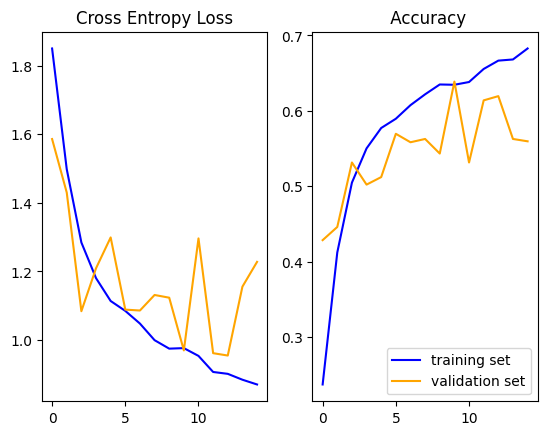

In [20]:
# plot diagnostic learning curves
def summarize_diagnostics(history_enhanced):
	# plot loss
	plt.subplot(121)
	plt.title('Cross Entropy Loss')
	plt.plot(history_enhanced.history['loss'], color='blue', label='train')
	plt.plot(history_enhanced.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	plt.subplot(122)
	plt.title(' Accuracy')
	plt.plot(history_enhanced.history['accuracy'], color='blue', label='train')
	plt.plot(history_enhanced.history['val_accuracy'], color='orange', label='validation')
	plt.legend(['training set', 'validation set'])
	plt.show()

summarize_diagnostics(history_enhanced)


In [21]:
y_pred_val = enhanced.predict(X_val)
y_pred_test = enhanced.predict(X_test)

63/63 [==============================] - 1s 12ms/step


[Text(0, 0.5, 'mel'),
 Text(0, 1.5, 'nv'),
 Text(0, 2.5, 'bcc'),
 Text(0, 3.5, 'acaic'),
 Text(0, 4.5, 'bkl'),
 Text(0, 5.5, 'df'),
 Text(0, 6.5, 'vasc')]

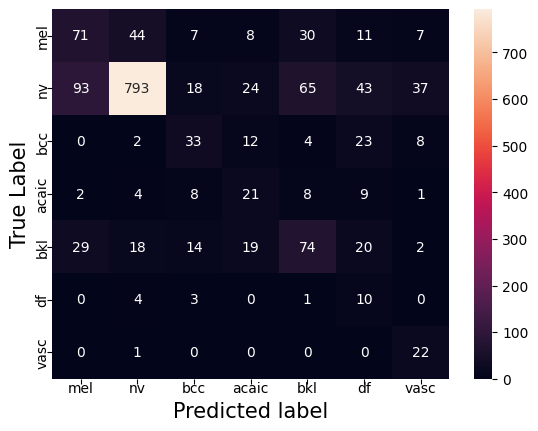

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

cmvalenh = sns.heatmap(confusion_matrix(y_val.argmax(axis=1), y_pred_val.argmax(axis=1)), annot=True, fmt='g')
cmvalenh.set_xlabel("Predicted label", fontsize = 15)
cmvalenh.set_ylabel("True Label", fontsize = 15)
cmvalenh.xaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], ha="center", va="center", rotation = 0)
cmvalenh.yaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], rotation=90, va="center",  ha="center")

[Text(0, 0.5, 'mel'),
 Text(0, 1.5, 'nv'),
 Text(0, 2.5, 'bcc'),
 Text(0, 3.5, 'acaic'),
 Text(0, 4.5, 'bkl'),
 Text(0, 5.5, 'df'),
 Text(0, 6.5, 'vasc')]

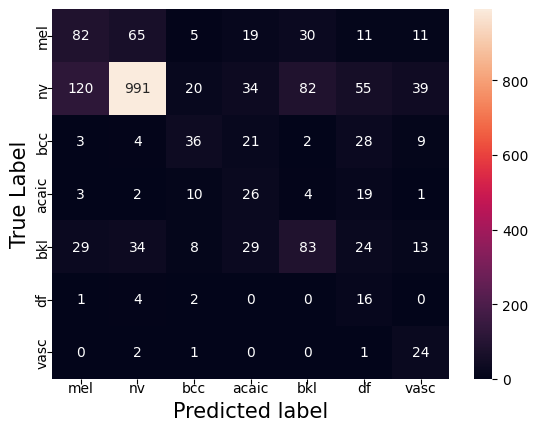

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
#Create confusion matrix
cmenh = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)), annot=True, fmt='g')
cmenh.set_xlabel("Predicted label", fontsize = 15)
cmenh.set_ylabel("True Label", fontsize = 15)
cmenh.xaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], ha="center", va="center", rotation = 0)
cmenh.yaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], rotation=90, va="center",  ha="center")

<ipython-input-24-86d9e917d757>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


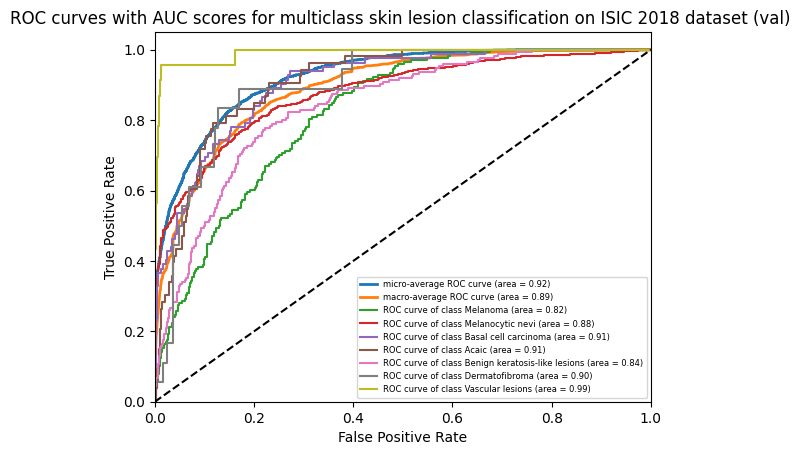

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Compute ROC curve and ROC area for each class
lesion_labels = [ "Melanoma", "Melanocytic nevi", "Basal cell carcinoma", "Acaic","Benign keratosis-like lesions", "Dermatofibroma","Vascular lesions"]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(lesion_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves with AUC scores for multiclass skin lesion classification on ISIC 2018 dataset (val) ')
plt.legend(loc="lower right", prop = {'size': 6})

plt.show()

<ipython-input-25-dde850de8b53>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


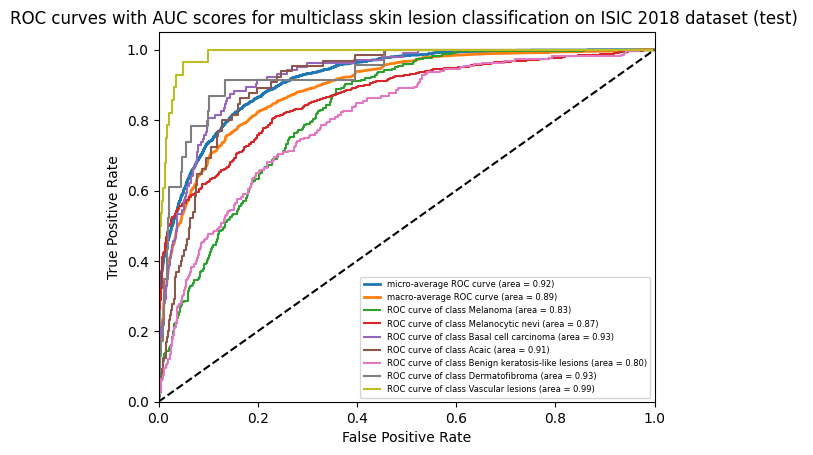

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Compute ROC curve and ROC area for each class
lesion_labels = [ "Melanoma", "Melanocytic nevi", "Basal cell carcinoma", "Acaic","Benign keratosis-like lesions", "Dermatofibroma","Vascular lesions"]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(lesion_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves with AUC scores for multiclass skin lesion classification on ISIC 2018 dataset (test) ')
plt.legend(loc="lower right", prop = {'size': 6})

plt.show()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
target_names = [f"{lesion_labels[i]}" for i in range(7)]
print(classification_report(y_test.argmax(axis=1), y_pred_test.argmax(axis=1) , target_names =target_names ))

                               precision    recall  f1-score   support

                     Melanoma       0.34      0.37      0.36       223
             Melanocytic nevi       0.90      0.74      0.81      1341
         Basal cell carcinoma       0.44      0.35      0.39       103
                        Acaic       0.20      0.40      0.27        65
Benign keratosis-like lesions       0.41      0.38      0.39       220
               Dermatofibroma       0.10      0.70      0.18        23
             Vascular lesions       0.25      0.86      0.38        28

                     accuracy                           0.63      2003
                    macro avg       0.38      0.54      0.40      2003
                 weighted avg       0.72      0.63      0.66      2003



In [28]:
from sklearn.metrics import confusion_matrix
cm_val_enh = confusion_matrix(y_val.argmax(axis=1), y_pred_val.argmax(axis=1))

for i in range(7):
    tp = cm_val_enh[i, i]
    fn = sum(cm_val_enh[i, :]) - tp
    fp = sum(cm_val_enh[:, i]) - tp
    tn = sum(sum(cm_val_enh)) - tp - fn - fp

    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp+fp)
    f1 = (2*tp)/(2*tp+fp+fn)
    print(f"Class {i}: accuracy = {accuracy:.2f}, sensitivity/recall = {sensitivity:.2f}, specificity = {specificity:.2f}, precision = {precision:.2f}, F1-score = {f1:.2f}")

Class 0: accuracy = 0.86, sensitivity/recall = 0.40, specificity = 0.91, precision = 0.36, F1-score = 0.38
Class 1: accuracy = 0.78, sensitivity/recall = 0.74, specificity = 0.86, precision = 0.92, F1-score = 0.82
Class 2: accuracy = 0.94, sensitivity/recall = 0.40, specificity = 0.97, precision = 0.40, F1-score = 0.40
Class 3: accuracy = 0.94, sensitivity/recall = 0.40, specificity = 0.96, precision = 0.25, F1-score = 0.31
Class 4: accuracy = 0.87, sensitivity/recall = 0.42, specificity = 0.92, precision = 0.41, F1-score = 0.41
Class 5: accuracy = 0.93, sensitivity/recall = 0.56, specificity = 0.93, precision = 0.09, F1-score = 0.15
Class 6: accuracy = 0.97, sensitivity/recall = 0.96, specificity = 0.97, precision = 0.29, F1-score = 0.44


In [27]:
from sklearn.metrics import confusion_matrix
cm_test_enh = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

for i in range(7):
    tp = cm_test_enh[i, i]
    fn = sum(cm_test_enh[i, :]) - tp
    fp = sum(cm_test_enh[:, i]) - tp
    tn = sum(sum(cm_test_enh)) - tp - fn - fp

    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp+fp)
    f1 = (2*tp)/(2*tp+fp+fn)
    print(f"Class {i}: accuracy = {accuracy:.2f}, sensitivity/recall = {sensitivity:.2f}, specificity = {specificity:.2f}, precision = {precision:.2f}, F1-score = {f1:.2f}")

Class 0: accuracy = 0.85, sensitivity/recall = 0.37, specificity = 0.91, precision = 0.34, F1-score = 0.36
Class 1: accuracy = 0.77, sensitivity/recall = 0.74, specificity = 0.83, precision = 0.90, F1-score = 0.81
Class 2: accuracy = 0.94, sensitivity/recall = 0.35, specificity = 0.98, precision = 0.44, F1-score = 0.39
Class 3: accuracy = 0.93, sensitivity/recall = 0.40, specificity = 0.95, precision = 0.20, F1-score = 0.27
Class 4: accuracy = 0.87, sensitivity/recall = 0.38, specificity = 0.93, precision = 0.41, F1-score = 0.39
Class 5: accuracy = 0.93, sensitivity/recall = 0.70, specificity = 0.93, precision = 0.10, F1-score = 0.18
Class 6: accuracy = 0.96, sensitivity/recall = 0.86, specificity = 0.96, precision = 0.25, F1-score = 0.38


In [29]:
print('F1 Score enhanced: %.3f' % f1_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Recall enhanced: %.3f' % recall_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Precision enhanced: %.3f' % precision_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Accuracy enhanced: %.3f' % accuracy_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1)))

F1 Score enhanced: 0.415
Recall enhanced: 0.553
Precision enhanced: 0.387
Accuracy enhanced: 0.639


In [30]:
print('F1 Score baseline: %.3f' % f1_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Recall baseline: %.3f' % recall_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Precision baseline: %.3f' % precision_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Accuracy baseline: %.3f' % accuracy_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)))

F1 Score baseline: 0.398
Recall baseline: 0.541
Precision baseline: 0.378
Accuracy baseline: 0.628


## Transfer Learning Model

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
import numpy as np

# Load the VGG16 model with pre-trained weights, excluding the top (fully connected) layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 120, 3))

# Freeze the layers of the pre-trained VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
with tf.device(device_name):
  # Create a new model on top of the VGG16 model
  full_model = Sequential()
  full_model.add(vgg_model)
  full_model.add(layers.Flatten())
  full_model.add(layers.Dense(64, activation='relu'))
  full_model.add(layers.Dense(7, activation='softmax'))
  full_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [16]:
# summary of the full transfer learning model
full_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 64)                393280    
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 15108423 (57.63 MB)
Trainable params: 393735 (1.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [17]:
# Define early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True, verbose = 1)

In [18]:
# Train the model
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS']= '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
historyvgg = full_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32,  callbacks=[es])

Epoch 1/20
165/165 [==============================] - 22s 93ms/step - loss: 1.4718 - accuracy: 0.4505 - val_loss: 1.4359 - val_accuracy: 0.4916
Epoch 2/20
165/165 [==============================] - 11s 68ms/step - loss: 1.0860 - accuracy: 0.6160 - val_loss: 1.2505 - val_accuracy: 0.5515
Epoch 3/20
165/165 [==============================] - 11s 64ms/step - loss: 0.9298 - accuracy: 0.6674 - val_loss: 0.9814 - val_accuracy: 0.6507
Epoch 4/20
165/165 [==============================] - 11s 66ms/step - loss: 0.8222 - accuracy: 0.7063 - val_loss: 1.4029 - val_accuracy: 0.4828
Epoch 5/20
165/165 [==============================] - 11s 65ms/step - loss: 0.7465 - accuracy: 0.7425 - val_loss: 1.4525 - val_accuracy: 0.4984
Epoch 6/20
165/165 [==============================] - 11s 65ms/step - loss: 0.6556 - accuracy: 0.7762 - val_loss: 1.0985 - val_accuracy: 0.5777
Epoch 7/20
165/165 [==============================] - 11s 65ms/step - loss: 0.5850 - accuracy: 0.8025 - val_loss: 1.0257 - val_accuracy:

In [19]:
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
train_loss, train_acc = full_model.evaluate (X_train, y_train)
val_loss, val_acc = full_model.evaluate(X_val, y_val)
test_loss, test_acc = full_model.evaluate(X_test, y_test)

63/63 [==============================] - 4s 53ms/step - loss: 0.9849 - accuracy: 0.6495


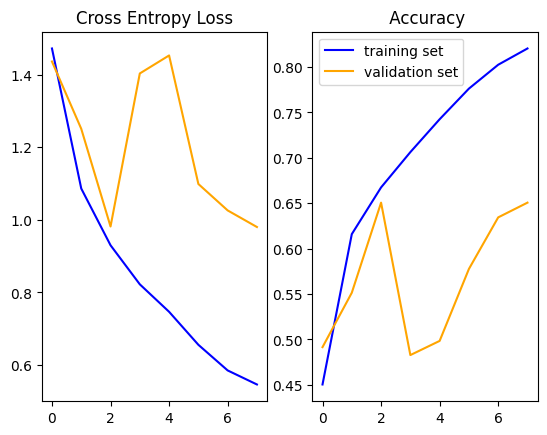

In [20]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(121)
	plt.title('Cross Entropy Loss')
	plt.plot(historyvgg.history['loss'], color='blue', label='train')
	plt.plot(historyvgg.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	plt.subplot(122)
	plt.title(' Accuracy')
	plt.plot(historyvgg.history['accuracy'], color='blue', label='train')
	plt.plot(historyvgg.history['val_accuracy'], color='orange', label='validation')
	plt.legend(['training set', 'validation set'])
	plt.show()

summarize_diagnostics(historyvgg)


In [ ]:
y_pred_val = full_model.predict(X_val)
y_pred_test = full_model.predict(X_test)

63/63 [==============================] - 3s 47ms/step


[Text(0, 0.5, 'mel'),
 Text(0, 1.5, 'nv'),
 Text(0, 2.5, 'bcc'),
 Text(0, 3.5, 'acaic'),
 Text(0, 4.5, 'bkl'),
 Text(0, 5.5, 'df'),
 Text(0, 6.5, 'vasc')]

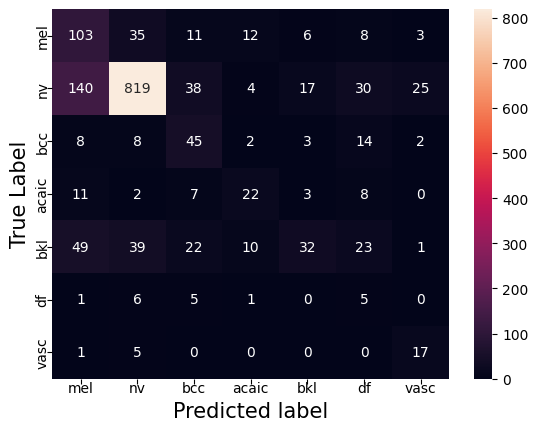

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

cmvalvggg = sns.heatmap(confusion_matrix(y_val.argmax(axis=1), y_pred_val.argmax(axis=1)), annot=True, fmt='g')
cmvalvggg.set_xlabel("Predicted label", fontsize = 15)
cmvalvggg.set_ylabel("True Label", fontsize = 15)
cmvalvggg.xaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], ha="center", va="center", rotation = 0)
cmvalvggg.yaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], rotation=90, va="center",  ha="center")

[Text(0, 0.5, 'mel'),
 Text(0, 1.5, 'nv'),
 Text(0, 2.5, 'bcc'),
 Text(0, 3.5, 'acaic'),
 Text(0, 4.5, 'bkl'),
 Text(0, 5.5, 'df'),
 Text(0, 6.5, 'vasc')]

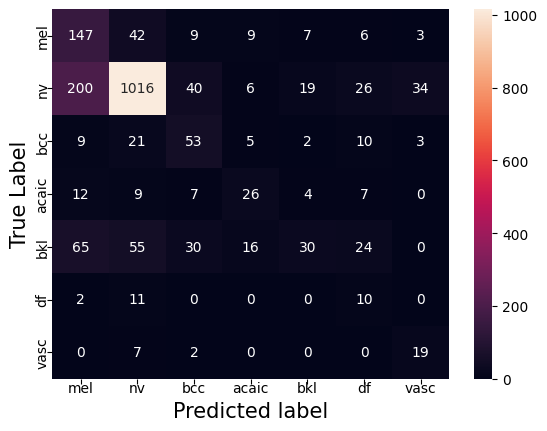

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
#Create confusion matrix
cmvgg = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)), annot=True, fmt='g')
cmvgg.set_xlabel("Predicted label", fontsize = 15)
cmvgg.set_ylabel("True Label", fontsize = 15)
cmvgg.xaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], ha="center", va="center", rotation = 0)
cmvgg.yaxis.set_ticklabels(["mel", "nv", "bcc","acaic","bkl", "df","vasc"], rotation=90, va="center",  ha="center")

<ipython-input-29-4a3e0e4a95c8>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


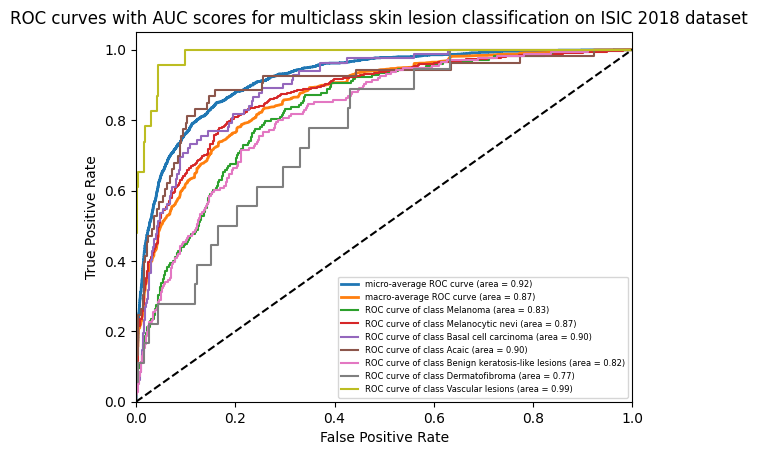

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Compute ROC curve and ROC area for each class
lesion_labels = [ "Melanoma", "Melanocytic nevi", "Basal cell carcinoma", "Acaic","Benign keratosis-like lesions", "Dermatofibroma","Vascular lesions"]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(lesion_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves with AUC scores for multiclass skin lesion classification on ISIC 2018 dataset (val) ')
plt.legend(loc="lower right", prop = {'size': 6})

plt.show()

<ipython-input-28-f8a00dd86abd>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


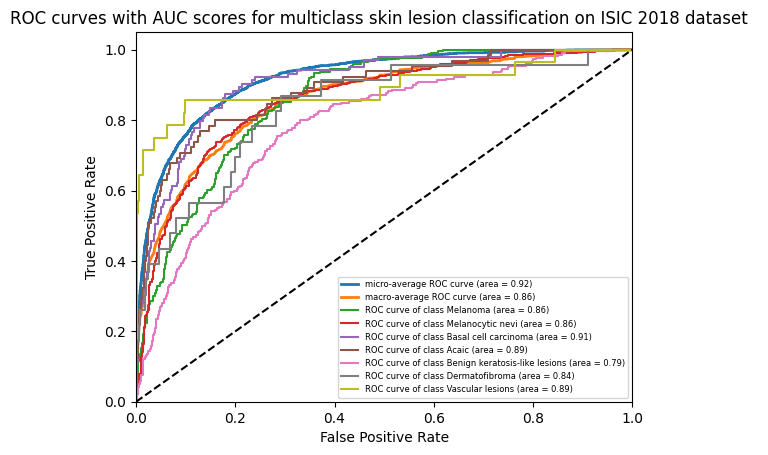

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
# Compute ROC curve and ROC area for each class
lesion_labels = [ "Melanoma", "Melanocytic nevi", "Basal cell carcinoma", "Acaic","Benign keratosis-like lesions", "Dermatofibroma","Vascular lesions"]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(7):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(lesion_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves with AUC scores for multiclass skin lesion classification on ISIC 2018 dataset  ')
plt.legend(loc="lower right", prop = {'size': 6})

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
target_names = [f"{lesion_labels[i]}" for i in range(7)]
print(classification_report(y_test.argmax(axis=1), y_pred_test.argmax(axis=1) , target_names =target_names ))

                               precision    recall  f1-score   support

                     Melanoma       0.34      0.66      0.45       223
             Melanocytic nevi       0.88      0.76      0.81      1341
         Basal cell carcinoma       0.38      0.51      0.43       103
                        Acaic       0.42      0.40      0.41        65
Benign keratosis-like lesions       0.48      0.14      0.21       220
               Dermatofibroma       0.12      0.43      0.19        23
             Vascular lesions       0.32      0.68      0.44        28

                     accuracy                           0.65      2003
                    macro avg       0.42      0.51      0.42      2003
                 weighted avg       0.72      0.65      0.66      2003



In [ ]:
from sklearn.metrics import confusion_matrix
cm_val_vgg = confusion_matrix(y_val.argmax(axis=1), y_pred_val.argmax(axis=1))

for i in range(7):
    tp = cm_val_vgg[i, i]
    fn = sum(cm_val_vgg[i, :]) - tp
    fp = sum(cm_val_vgg[:, i]) - tp
    tn = sum(sum(cm_val_vgg)) - tp - fn - fp

    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp+fp)
    f1 = (2*tp)/(2*tp+fp+fn)
    print(f"Class {i}: accuracy = {accuracy:.2f}, sensitivity/recall = {sensitivity:.2f}, specificity = {specificity:.2f}, precision = {precision:.2f}, F1-score = {f1:.2f}")

Class 0: accuracy = 0.82, sensitivity/recall = 0.58, specificity = 0.85, precision = 0.33, F1-score = 0.42
Class 1: accuracy = 0.78, sensitivity/recall = 0.76, specificity = 0.82, precision = 0.90, F1-score = 0.82
Class 2: accuracy = 0.93, sensitivity/recall = 0.55, specificity = 0.95, precision = 0.35, F1-score = 0.43
Class 3: accuracy = 0.96, sensitivity/recall = 0.42, specificity = 0.98, precision = 0.43, F1-score = 0.42
Class 4: accuracy = 0.89, sensitivity/recall = 0.18, specificity = 0.98, precision = 0.52, F1-score = 0.27
Class 5: accuracy = 0.94, sensitivity/recall = 0.28, specificity = 0.95, precision = 0.06, F1-score = 0.09
Class 6: accuracy = 0.98, sensitivity/recall = 0.74, specificity = 0.98, precision = 0.35, F1-score = 0.48


In [ ]:
from sklearn.metrics import confusion_matrix
cm_test_vgg = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

for i in range(7):
    tp = cm_test_vgg[i, i]
    fn = sum(cm_test_vgg[i, :]) - tp
    fp = sum(cm_test_vgg[:, i]) - tp
    tn = sum(sum(cm_test_vgg)) - tp - fn - fp

    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp+fp)
    f1 = (2*tp)/(2*tp+fp+fn)
    print(f"Class {i}: accuracy = {accuracy:.2f}, sensitivity/recall = {sensitivity:.2f}, specificity = {specificity:.2f}, precision = {precision:.2f}, F1-score = {f1:.2f}")

Class 0: accuracy = 0.82, sensitivity/recall = 0.66, specificity = 0.84, precision = 0.34, F1-score = 0.45
Class 1: accuracy = 0.77, sensitivity/recall = 0.76, specificity = 0.78, precision = 0.88, F1-score = 0.81
Class 2: accuracy = 0.93, sensitivity/recall = 0.51, specificity = 0.95, precision = 0.38, F1-score = 0.43
Class 3: accuracy = 0.96, sensitivity/recall = 0.40, specificity = 0.98, precision = 0.42, F1-score = 0.41
Class 4: accuracy = 0.89, sensitivity/recall = 0.14, specificity = 0.98, precision = 0.48, F1-score = 0.21
Class 5: accuracy = 0.96, sensitivity/recall = 0.43, specificity = 0.96, precision = 0.12, F1-score = 0.19
Class 6: accuracy = 0.98, sensitivity/recall = 0.68, specificity = 0.98, precision = 0.32, F1-score = 0.44


In [ ]:
print('F1 Score vgg: %.3f' % f1_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Recall vgg: %.3f' % recall_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Precision vgg: %.3f' % precision_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1),average = 'macro'))
print('Accuracy vgg: %.3f' % accuracy_score(y_val.argmax(axis=1), y_pred_val.argmax(axis=1)))

F1 Score vgg: 0.420
Recall vgg: 0.501
Precision vgg: 0.421
Accuracy vgg: 0.651


In [ ]:
print('F1 Score baseline: %.3f' % f1_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Recall baseline: %.3f' % recall_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Precision baseline: %.3f' % precision_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1),average = 'macro'))
print('Accuracy baseline: %.3f' % accuracy_score(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)))

F1 Score baseline: 0.420
Recall baseline: 0.512
Precision baseline: 0.419
Accuracy baseline: 0.650
